# **Final Project Big Data Analytic And Prediction**
**Prediksi Total Penjualan**

---



## Anggota Kelompok
1. Muhammad Ammar Afif
2. Muhammad Febrian Syusada Nasution
3. Muhammad Ikhwan Pramudika
4. Firdaus Zakaria Yahya Isa


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn import metrics
from sklearn.datasets import load_diabetes
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project BDA Ghost/cinemaTicket.csv')

## Exploratory Data Analysis

In [ ]:
# Mellihat 5 baris pertama dari kumpulan data
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [ ]:
# Mellihat 5 baris terakhir dari kumpulan data
df.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [ ]:
# Melihat bentuk datasetnya
df.shape

(142524, 14)

In [ ]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [ ]:
# Melihat informasi kolom datasetnya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [ ]:
# Periksa nilai yang hilang
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Kita jatuhkan nilai null
print("Nilai Nol yang dijatuhkan:")
df.isnull().sum()

Nilai Nol yang dijatuhkan:


film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

# Analisis Korelasi

<ipython-input-17-e882408a8c5e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True , cmap="crest")


<Axes: >

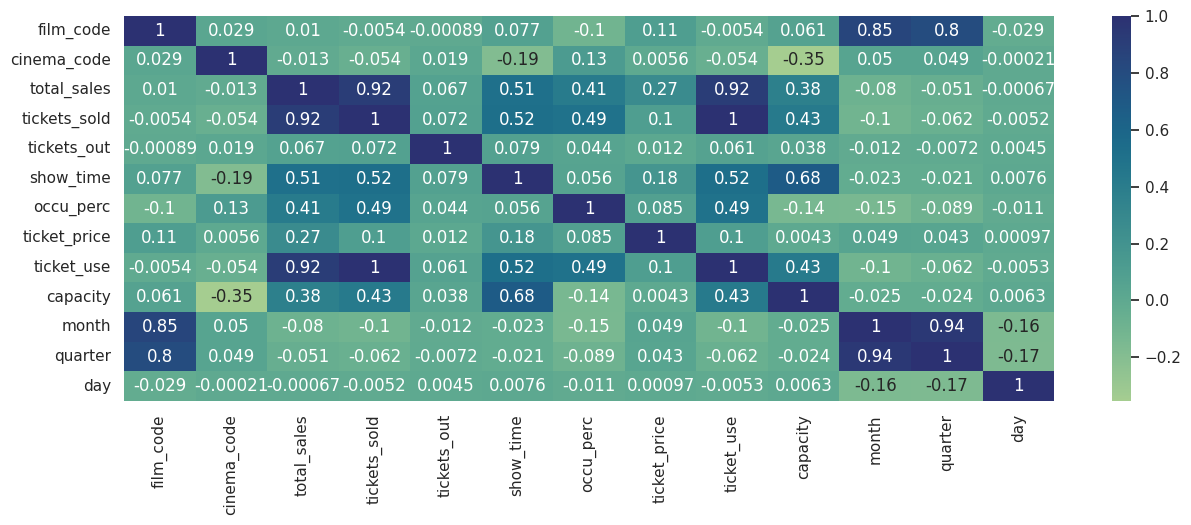

In [ ]:
# Korelasi Heatmap untuk melihat korelasi antar kolom
sns.set_theme(color_codes=True)
plt.figure(figsize = (15,5))
sns.heatmap(df.corr(), annot = True , cmap="crest")

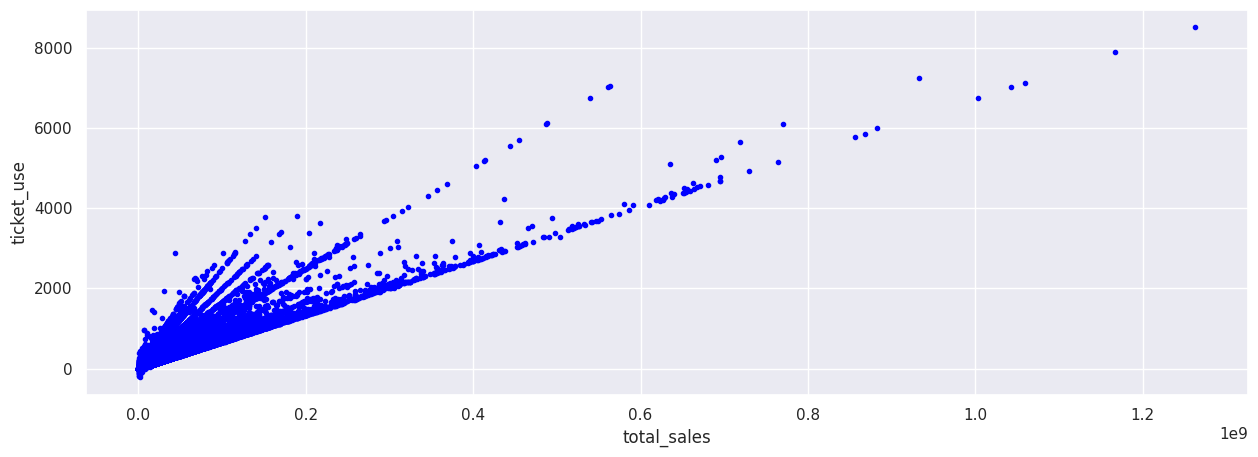

In [ ]:
# Menyelidiki fitur yang memiliki korelasi tinggi dengan target

sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('ticket_use')
plt.scatter(df.total_sales,df.ticket_use,color='blue',marker='.')

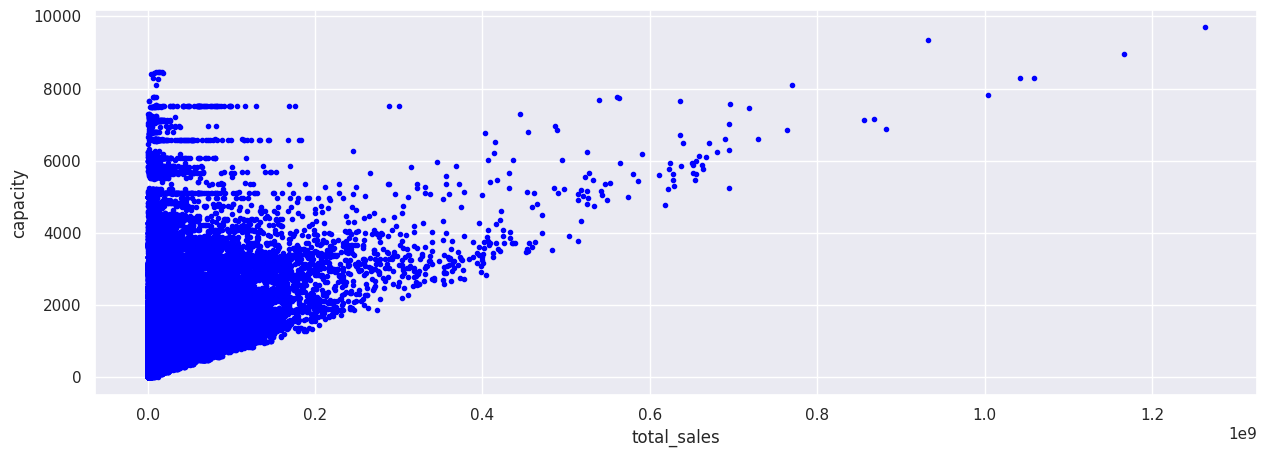

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('capacity')
plt.scatter(df.total_sales,df.capacity,color='blue',marker='.')

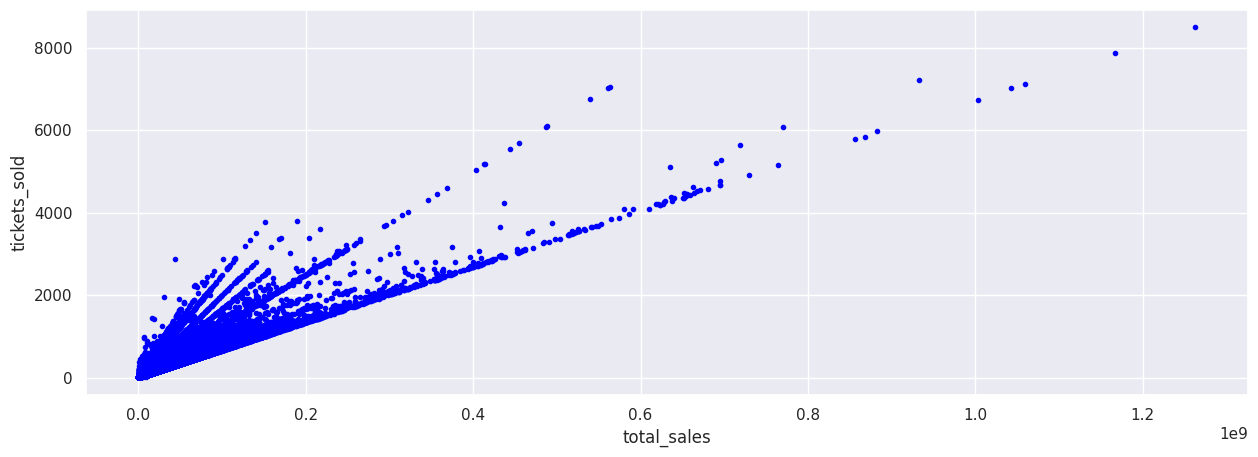

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('tickets_sold')
plt.scatter(df.total_sales,df.tickets_sold,color='blue',marker='.')

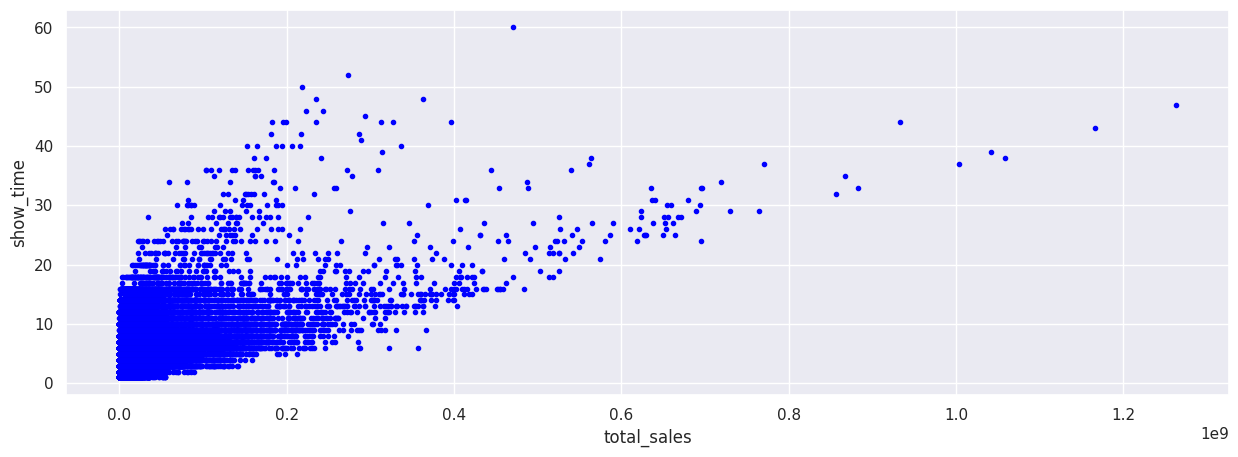

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('show_time')
plt.scatter(df.total_sales,df.show_time,color='blue',marker='.')

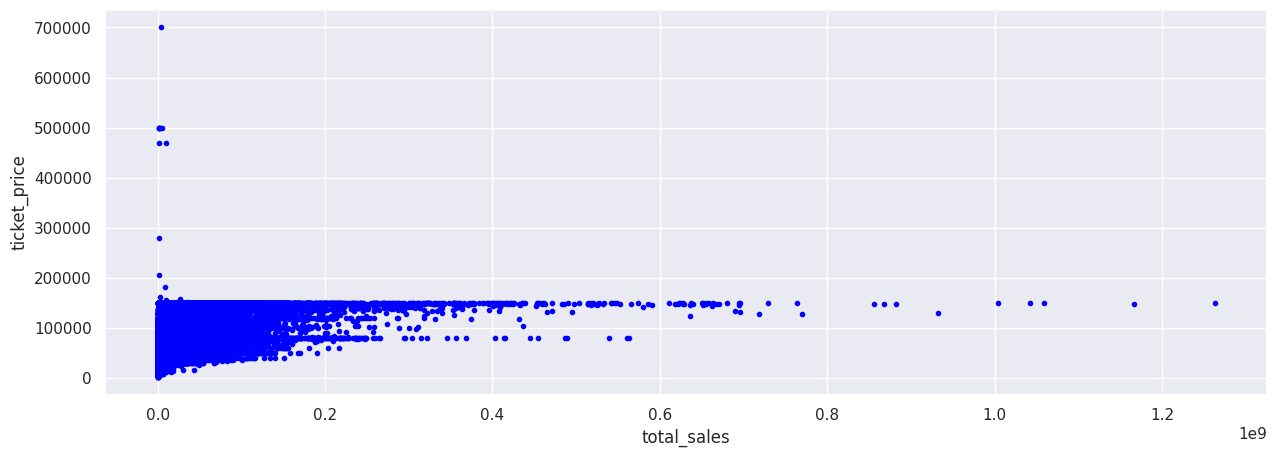

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('ticket_price')
plt.scatter(df.total_sales,df.ticket_price,color='blue',marker='.')

<ipython-input-23-d0e3cd5a5a5d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_sales'],bins=50,color='r',ax=ax)
<ipython-input-23-d0e3cd5a5a5d>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['total_sales']),bins=40,color='b',ax=ax)


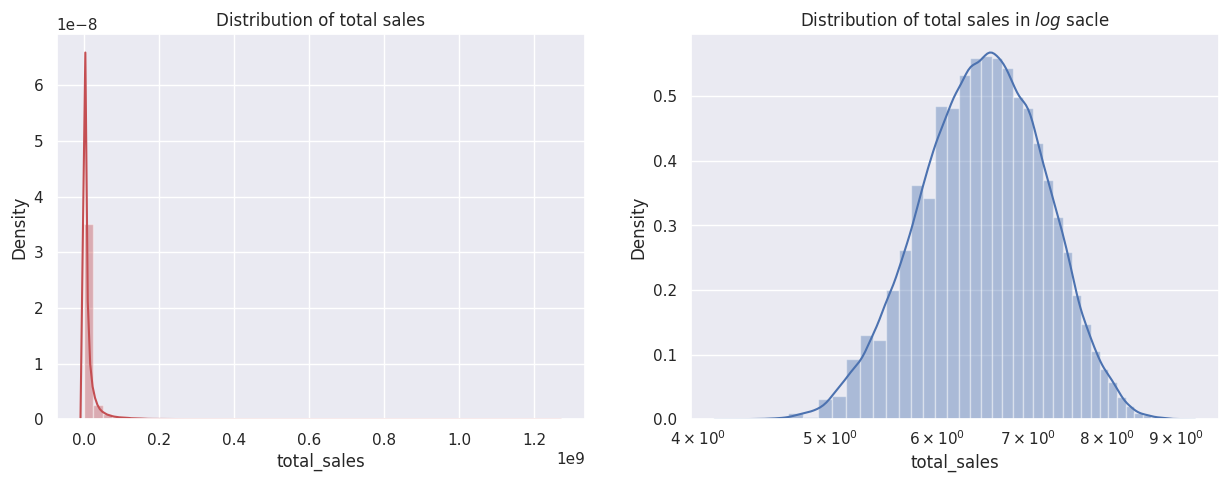

In [ ]:
# Normalisasi target menggunakan skala log

f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.distplot(df['total_sales'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of total sales')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['total_sales']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of total sales in $log$ sacle')
ax.set_xscale('log');

# Model Prediksi


In [ ]:
# Memisahkan data menjadi pelatihan dan pengujian

bebas = ['tickets_sold', 'capacity',  'ticket_use', ]
X = df[bebas]
y = np.log10(df['total_sales'])

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Normalisasi Data

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
x_train = scaling.transform(X_train)
x_test = scaling.transform(X_test)

In [ ]:
# Membuat objek regresi linier
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

<ipython-input-29-55526280d0f1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
<ipython-input-29-55526280d0f1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=

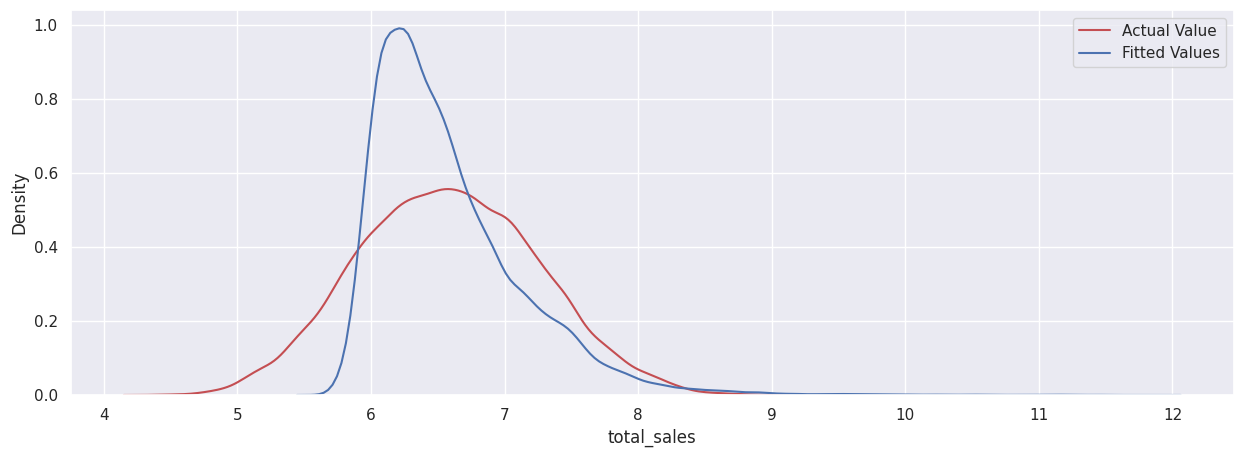

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=ax1)
ax1.ticklabel_format(style='plain')
plt.legend(loc='best')
plt.show()

# Model Evaluasi


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.2949341748019459
MSE: 0.13784964594196444
RMSE: 0.37128108750913297
R-Squared: 0.6933461162751906


In [ ]:
df_actual_pre ={'Actual': y_test, 'Predicted': y_pred}
df1_actual_pre= pd.DataFrame(df_actual_pre)
df1_actual_pre.head(10)

,Actual,Predicted
59421,7.049218,7.203477
107391,6.591065,6.286786
43203,5.505150,6.080956
12970,6.990339,6.410294
25632,6.130334,6.507823
35086,5.380211,5.935602
86183,5.000000,5.976729
38596,6.450249,6.537890
10684,6.746634,6.522035
56996,8.109106,8.061293


In [ ]:
print(X_train.shape)
print(X_test.shape)

(106799, 6)
(35600, 6)


In [ ]:
# Mendapatkan nilai coef & intercept
print('Intercept:', reg.intercept_)
print('Coef:', reg.coef_)

Intercept: 11.903977320662559
Coef: [ 1.85282075  1.02121791  0.91742306  0.66967774  1.91622752 -0.00273599]
